In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import matplotlib as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/compresive_strength_concrete.csv")

In [ ]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.info

<bound method DataFrame.info of       Cement (component 1)(kg in a m^3 mixture)  ...  Concrete compressive strength(MPa, megapascals) 
0                                         540.0  ...                                             79.99
1                                         540.0  ...                                             61.89
2                                         332.5  ...                                             40.27
3                                         332.5  ...                                             41.05
4                                         198.6  ...                                             44.30
...                                         ...  ...                                               ...
1025                                      276.4  ...                                             44.28
1026                                      322.2  ...                                             31.18
1027                                     

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
for i in range(len(df.columns)):
    print(df.iloc[:, i].value_counts())
    print('#'*25)

362.6    20
425.0    20
251.4    15
310.0    14
446.0    14
         ..
313.8     1
147.8     1
260.9     1
136.4     1
321.3     1
Name: Cement (component 1)(kg in a m^3 mixture), Length: 278, dtype: int64
#########################
0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
178.1      1
148.9      1
98.8       1
128.9      1
169.4      1
Name: Blast Furnace Slag (component 2)(kg in a m^3 mixture), Length: 185, dtype: int64
#########################
0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
71.0       1
138.0      1
166.0      1
182.0      1
143.2      1
Name: Fly Ash (component 3)(kg in a m^3 mixture), Length: 156, dtype: int64
#########################
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
127.0      1
166.7      1
191.3      1
172.4      1
177.6      1
Name: Water  (component 4)(kg in a m^3 mixture), Length: 195, dtype: int64
#########################
0.0     379
11.6     3

In [ ]:
# shuffling data
#df = df.sample(frac=1).reset_index(drop=True)

# total data = 1030

data = df.drop('Concrete compressive strength(MPa, megapascals) ', 1)
targets = df.loc[:, 'Concrete compressive strength(MPa, megapascals) ']


In [ ]:
targets

0       39.06
1       52.82
2       27.92
3       14.60
4       23.85
        ...  
1025    38.80
1026    40.23
1027    33.12
1028     8.20
1029    48.79
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [ ]:
data.shape

(1030, 8)

In [ ]:
targets.shape

(1030,)

In [ ]:
train_data = data.iloc[0:515]
train_targets = targets.iloc[0:515]

val_data = data.iloc[515:721]
val_targets = targets.iloc[515:721]

test_data = data.iloc[721:]
test_targets =targets.iloc[721:]

In [ ]:
print(train_data.shape)
print(train_targets.shape)
print('#')
print(val_data.shape)
print(val_targets.shape)
print('#')
print(test_data.shape)
print(test_targets.shape)

(515, 8)
(515,)
#
(206, 8)
(206,)
#
(309, 8)
(309,)


In [ ]:
mean = train_data.mean()
std = train_data.std()
train_data -= mean
train_data /= std
val_data -= mean
val_data /= std
test_data -= mean
test_data /= std

In [ ]:
#Build a Model
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10,activation = 'relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(8,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='Adam',loss = 'mse',metrics=['mae'])
  return model

In [ ]:
model = build_model()

 

In [ ]:
history = model.fit(train_data,train_targets,validation_data = (val_data,val_targets),epochs=100,verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 1527.3486 - mae: 35.7614 - val_loss: 1525.9685 - val_mae: 35.1819
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1610.0226 - mae: 36.8155 - val_loss: 1508.5668 - val_mae: 34.9430
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 1468.0801 - mae: 35.1443 - val_loss: 1492.2964 - val_mae: 34.7164
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 1534.4839 - mae: 35.7509 - val_loss: 1474.7609 - val_mae: 34.4718
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 1465.5961 - mae: 35.0348 - val_loss: 1454.8811 - val_mae: 34.1918
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 1478.7167 - mae: 35.1484 - val_loss: 1429.8411 - val_mae: 33.8390
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 1356.7952 - mae: 33.4530 - val_loss: 1397.5946 - val_mae: 33.3836
Epoch 8/100
17/17 [=======

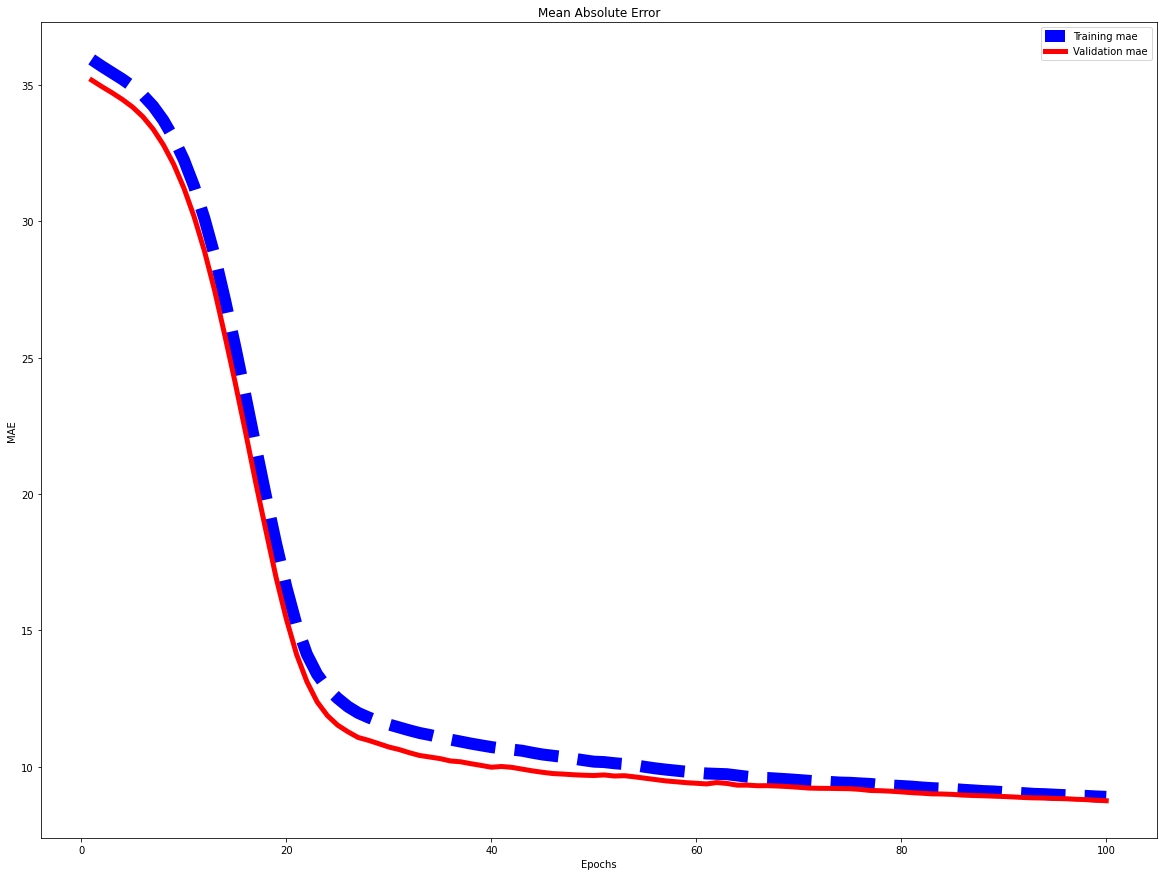

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

**Adding Regularizer**

In [ ]:
from keras import layers, models, regularizers

def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.L2(0.001)))
    
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
        
    model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    
    
    return model

In [ ]:
model_1 = build_model()

In [ ]:
history_1 = model_1.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 1497.2619 - mae: 35.4359 - val_loss: 1453.5421 - val_mae: 34.2369
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1363.8528 - mae: 33.5930 - val_loss: 1418.1301 - val_mae: 33.7642
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 1425.0874 - mae: 34.2423 - val_loss: 1377.1002 - val_mae: 33.2050
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 1383.8558 - mae: 33.7086 - val_loss: 1327.9004 - val_mae: 32.5257
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 1319.0410 - mae: 33.2890 - val_loss: 1267.5670 - val_mae: 31.6706
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 1330.0104 - mae: 32.8918 - val_loss: 1196.3389 - val_mae: 30.6279
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 1170.7202 - mae: 30.7626 - val_loss: 1109.0341 - val_mae: 29.3215
Epoch 8/100
17/17 [=======

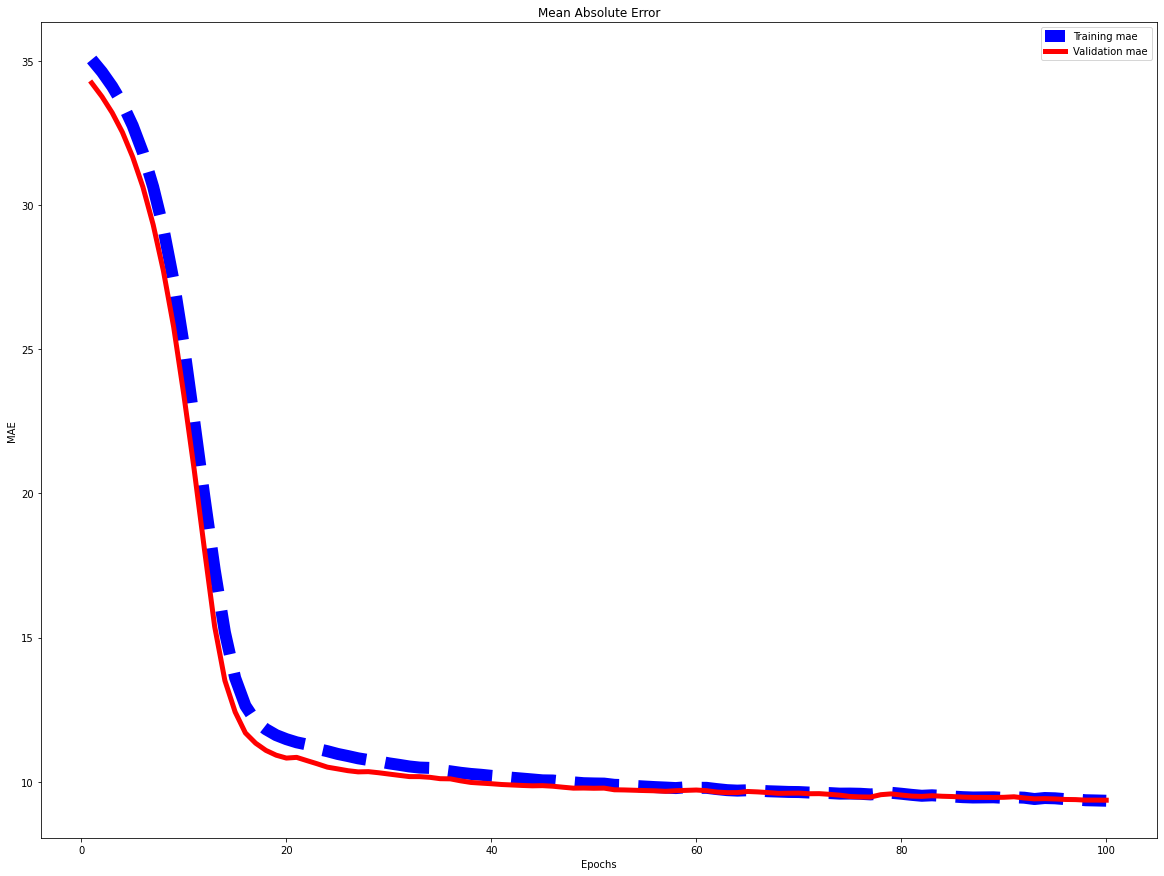

In [ ]:
plt.figure(figsize=(20,15))

mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

**Adding Dropout**

In [ ]:

    
from keras import models
from keras import layers
model_drop = models.Sequential()
model_drop.add(layers.Dense(10,activation = 'relu',input_shape=(train_data.shape[1],)))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(8,activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(6,activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(1))



In [ ]:
model_drop.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_16 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_17 (Dropout)         (None, 6)                 0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

In [ ]:
model_drop.compile(optimizer='Adam', loss='mse', metrics=['mae'])

In [ ]:

new_istory = model_drop.fit(train_data, train_targets, validation_data = (val_data, val_targets), epochs=100, verbose=1)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 1460.4375 - mae: 34.6042 - val_loss: 1433.2163 - val_mae: 33.8469
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1448.3066 - mae: 34.5879 - val_loss: 1410.7527 - val_mae: 33.5255
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 1332.1123 - mae: 32.9233 - val_loss: 1385.0510 - val_mae: 33.1524
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 1438.7012 - mae: 34.2351 - val_loss: 1353.9133 - val_mae: 32.6953
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 1388.2278 - mae: 33.5732 - val_loss: 1318.7529 - val_mae: 32.1752
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 1293.8094 - mae: 32.3733 - val_loss: 1279.5394 - val_mae: 31.5844
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 1237.3010 - mae: 31.5480 - val_loss: 1232.7375 - val_mae: 30.8787
Epoch 8/100
17/17 [=======

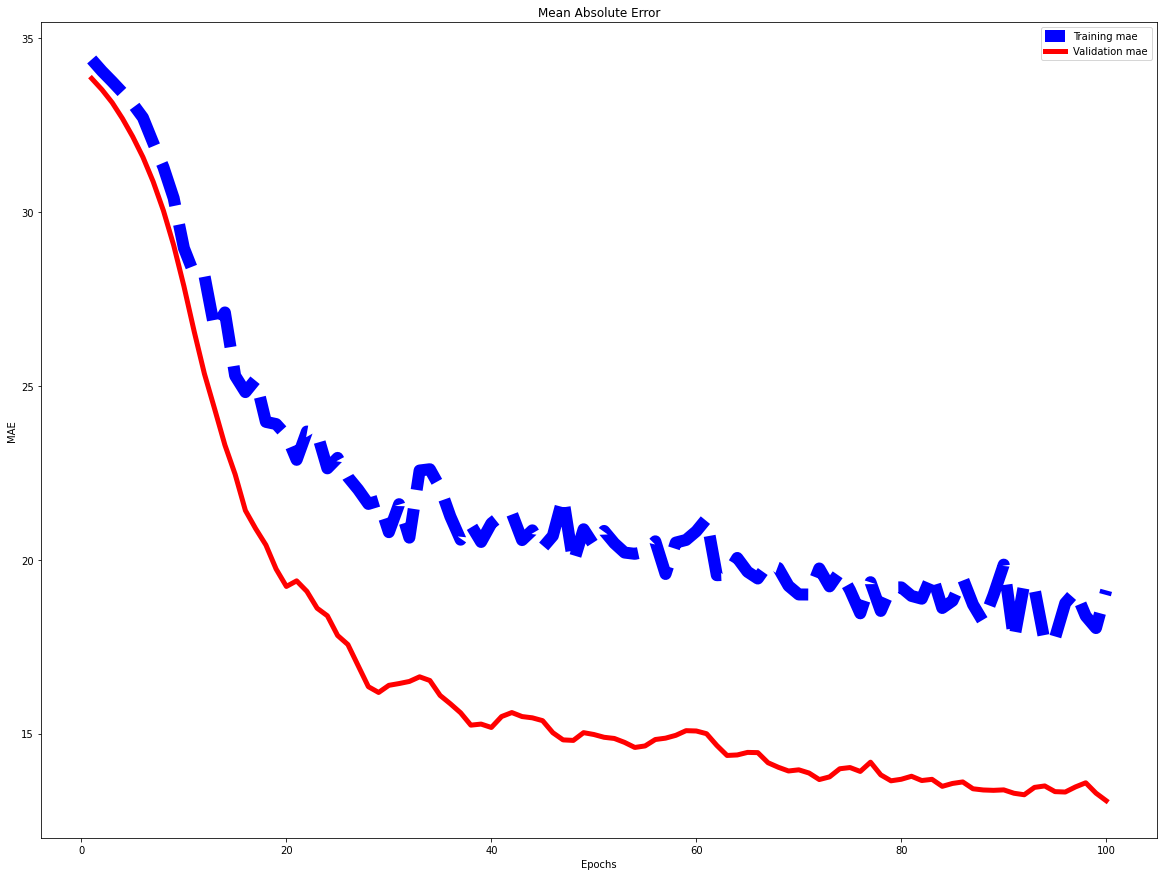

In [ ]:
plt.figure(figsize=(20,15))

mae = new_istory.history['mae']
val_mae = new_istory.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'b--', label='Training mae', linewidth=12)
plt.plot(epochs, val_mae, 'r', label='Validation mae', linewidth=5)

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(test_data)

8

In [ ]:
prediction.shape

(309, 1)

In [ ]:
prediction = prediction.reshape(309)

In [ ]:
prediction.shape

(309,)

In [ ]:
output = pd.DataFrame({'Actual': test_targets})
output

,Actual
721,31.35
722,9.45
723,51.73
724,45.71
725,8.54
...,...
1025,38.80
1026,40.23
1027,33.12
1028,8.20


In [ ]:
output['Predicted'] = prediction

In [ ]:
output.reset_index(inplace=True)

In [ ]:
output['Absolute Error'] = np.abs(output['Predicted'] - output['Actual'])

In [ ]:
output

,index,Actual,Predicted,Absolute Error
0,721,31.35,19.441393,11.908607
1,722,9.45,19.830894,10.380894
2,723,51.73,23.872311,27.857689
3,724,45.71,16.586658,29.123342
4,725,8.54,19.880363,11.340363
...,...,...,...,...
304,1025,38.80,20.128208,18.671792
305,1026,40.23,16.490499,23.739501
306,1027,33.12,20.236286,12.883714
307,1028,8.20,18.205956,10.005956


In [ ]:
output.loc[:, 'Absolute Error'].describe()

count    309.000000
mean      16.854614
std       12.296435
min        0.027532
25%        7.383084
50%       13.962332
75%       24.397597
max       59.778173
Name: Absolute Error, dtype: float64